In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
import joblib

In [2]:
data = pd.read_csv("E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Prepared_data\\Heart Disease.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1


In [12]:
X = data.drop('target', axis=1)
Y = data['target']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size= 0.25, random_state = 355)

In [14]:
decision = DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

grid_search = GridSearchCV(estimator = decision,
                     param_grid = grid_param,
                     cv=10,
                    n_jobs =-1)

In [15]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [17]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 7, 'splitter': 'random'}


In [24]:
decision = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, min_samples_leaf = 6, 
                                  min_samples_split = 7, splitter = 'random')
decision.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [25]:
# Check Accuracy based on Train data

y_predict = decision.predict(x_train)

print("Based On trian Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_train, y_predict), '\n')
print("Accuracy_score: ", accuracy_score(y_train, y_predict), '\n')
print("classification_report: \n\n", classification_report(y_train, y_predict))

Based On trian Data


Confusion_matrix: 
 [[ 90  16]
 [ 21 100]] 

Accuracy_score:  0.8370044052863436 

classification_report: 

               precision    recall  f1-score   support

           0       0.81      0.85      0.83       106
           1       0.86      0.83      0.84       121

    accuracy                           0.84       227
   macro avg       0.84      0.84      0.84       227
weighted avg       0.84      0.84      0.84       227



0.8377514423826602

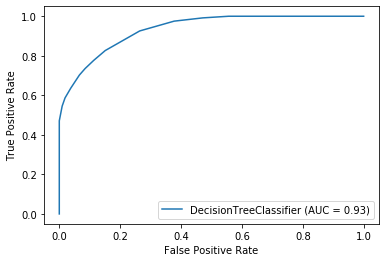

In [26]:
metrics.plot_roc_curve(decision, x_train, y_train)
metrics.roc_auc_score(y_train, y_predict, average=None)

In [27]:
# Based on Test Data

y_predict1 = decision.predict(x_test)

print("Based On test Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_test, y_predict1), '\n')
print("Accuracy_score: ", accuracy_score(y_test,y_predict1), '\n')
print("classification_report: \n\n", classification_report(y_test,y_predict1))

Based On test Data


Confusion_matrix: 
 [[25  7]
 [ 7 37]] 

Accuracy_score:  0.8157894736842105 

classification_report: 

               precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.84      0.84      0.84        44

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



0.8110795454545454

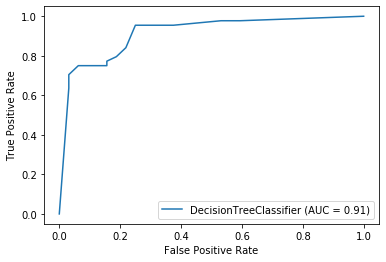

In [28]:
metrics.plot_roc_curve(decision, x_test, y_test)
metrics.roc_auc_score(y_test, y_predict1, average=None)

# Here using Decision Tree,


    for train data:--
        
        accuracy score is: 83% (***)
        precision is:  84%
        recall is: 84%

            
    for test data:--
        
        accuracy score is: 81% (***)
        precision is:  82%
        recall is: 82%
            
            
# Therefore we can say that my Model is a Generalized Model (low bias and low variance)

In [30]:
# Model Dumping


joblib.dump(decision, "E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\decision.pkl")


['E:\\Dibyendu\\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\decision.pkl']